In [2]:
import string
import math
import sys
import pandas as pd
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("bd_resultat_simple.csv",sep=";",header=0,low_memory=0)
df["type_res"]=df["type_res"].apply(lambda x: np.NaN if str(x).isspace() else x)
df = df.fillna(0)

In [4]:
df2=df.replace(['Autoroute','Train','Autres'],[1,2,3])

In [5]:
df2.head()

,uid,type_res,type_init
0,1,3,1
1,2,3,1
2,3,3,1
3,4,3,1
4,5,2,1


In [6]:
df2.shape

(24853251, 3)

In [7]:
#nb de lignes egale:
egal = df2.type_res == df2.type_init
print("Nombre de lignes tel que le type de transport détecté = type de transport initial: ",np.sum(egal))
print("taux de correction:","{:.2f}".format(np.sum(egal)*100/len(df2)), "%")

Nombre de lignes tel que le type de transport détecté = type de transport initial:  10341230
taux de correction: 41.61 %


In [8]:
#DataFrame.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None)
sous_df2 = df2.sample(frac=0.1)

In [9]:
sous_df2.shape

(2485325, 3)

In [10]:
y1 = sous_df2['type_init']
y2 = sous_df2['type_res']
print('mean of type_init = %.2f  ' %y1.mean(), 'std of type_init = %.2f\n' %y1.std())
print('mean of type_res = %.2f  ' %y2.mean(), 'std of type_res = %.2f\n' %y2.std())

mean of type_init = 1.72   std of type_init = 1.29

mean of type_res = 1.69   std of type_res = 1.30



Interprétation_1: les échantillons ne suivent pas une loi normale


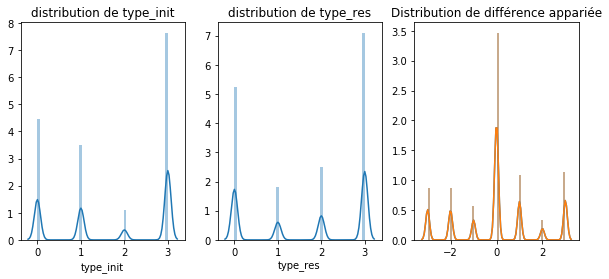

In [11]:
import seaborn as sns
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

diff = y1-y2
sns.distplot(diff)

sns.distplot(y1,ax=ax1)
sns.distplot(y2,ax=ax2)
sns.distplot(diff,ax=ax3)
ax1.set_title('distribution de type_init')
ax2.set_title('distribution de type_res')
ax3.set_title('Distribution de différence appariée')


print('Interprétation_1: les échantillons ne suivent pas une loi normale')
#la D-value et p-value du test Kolmogorov-Smirnov montre aussi que les données ne suivent pas une loi normale
#stats.kstest(y1,'norm',alternative ='two-sided', mode='asymp')
#stats.kstest(y2,'norm',alternative ='two-sided', mode='asymp')

In [12]:
#levene's test
print(stats.levene(y1,y2))
print('Interprétation_2: p-value << 0.05, les variances des échantillons ne sont pas honogènes.\n')
#si p-value << 0.05 --> les variances ne sont pas honogènes (rejette homogènes)
#on applique donc ensuite un test non paramétrique

LeveneResult(statistic=4254.570516864698, pvalue=0.0)
Interprétation_2: p-value << 0.05, les variances des échantillons ne sont pas honogènes.



In [14]:
'''
    Dans le cas de 2 échantillons appariés avec les variables qualitatives, 
    on peut appliquer un test non paramétrique --> test de chi2
    qui nous permet d'analyser la corrélation de deux variables qualitatives. 
'''
contingency = pd.crosstab(y1,y2)
print(stats.chi2_contingency(contingency))
print('Interprétation_3: khi2-value grande, p-value << 0.05,  d.d.l = 9')
print('Les variables présentent une association statistiquement significative (on rejette H0)\n')


(297996.7569066886, 0.0, 9, array([[208319.4058608 ,  72594.9742255 ,  99055.00883788,
        281957.61107582],
       [163997.23957028,  57149.62238138,  77980.00358102,
        221968.13446732],
       [ 51570.40399103,  17971.21172201,  24521.51205979,
         69799.87222717],
       [358285.95057789, 124855.19167111, 170363.47552131,
        484935.38222969]]))
Interprétation_3: khi2-value grande, p-value << 0.05,  d.d.l = 9
Les variables présentent une association statistiquement significative (on rejette H0)

